In [1]:
import pandas as pd
wine = pd.read_csv('applied python michigan/winequality-red.csv', sep=',')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


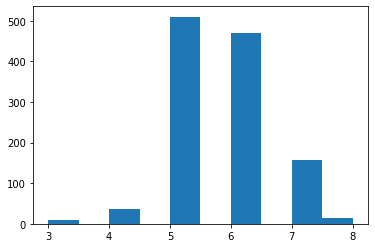

In [2]:
X = wine.drop(columns='quality').values
y = wine.quality

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)

import matplotlib.pyplot as plt
%matplotlib inline

_=plt.hist(y_train)

C:\Users\Vova\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


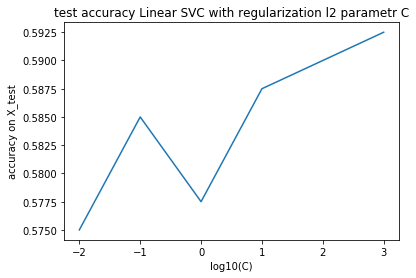

In [5]:
from sklearn.svm import LinearSVC
import numpy as np

C_vals = np.array([0.01, 0.1, 1.0, 10.0, 100.0, 1e3])
C_results = []
for C in C_vals:
    clf = LinearSVC(random_state=0, penalty='l2', C=C,  max_iter=10**5, tol=1e-4)
    clf.fit(X_train, y_train)
    C_results.append(clf.score(X_test, y_test))

plt.plot(np.log10(C_vals), C_results, )

plt.xlabel('log10(C)')
plt.ylabel('accuracy on X_test')
plt.title('test accuracy Linear SVC with regularization l2 parametr C')
plt.show()

In [6]:
from sklearn import metrics

lin_model = LinearSVC(random_state=0, penalty='l2', C=1e4,  max_iter=10**6)
lin_model.fit(X_train, y_train)

print(metrics.classification_report(y_test, lin_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000        16
           5      0.606     0.836     0.703       171
           6      0.582     0.533     0.556       167
           7      0.455     0.119     0.189        42
           8      0.000     0.000     0.000         3

    accuracy                          0.593       400
   macro avg      0.274     0.248     0.241       400
weighted avg      0.550     0.593     0.552       400



C:\Users\Vova\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vova\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from keras.utils import np_utils

dummy_y_train = np_utils.to_categorical(y_train)[:,3:]
dummy_y_test = np_utils.to_categorical(y_test)[:,3:]

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.initializers import RandomNormal
from keras.backend import clear_session
from numpy.random import seed
from tensorflow import random as tfr

def create_and_fit_1layerPerceptron( X_train, y_train, X_val, y_val, epochs=1000, n_neurons=10, act='relu', steps=10):
    clear_session()
    
    seed(1)
    tfr.set_seed(2)
    
    init = RandomNormal(mean=0.0, stddev=1.0, seed=0)
    
    model = Sequential(
    [
        Dense(n_neurons, input_dim=X_train.shape[1], activation=act, kernel_initializer=init,bias_initializer='zeros')
        ,Dense(y_train.shape[1], activation='softmax', kernel_initializer=init, bias_initializer='zeros')
    ]
    )
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if X_val is None or y_val is None:
        history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps, verbose=0)
    else:
        history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps, verbose=0,
                            validation_steps=1, validation_data=(X_val, y_val))
    
    return model, history

Using TensorFlow backend.


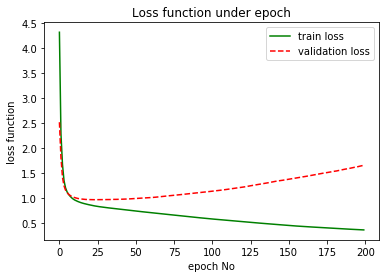

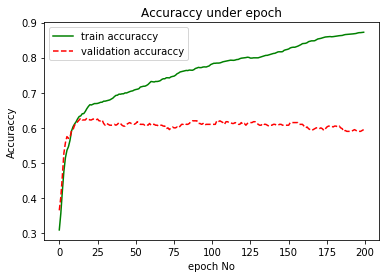

In [8]:
model, history = create_and_fit_1layerPerceptron(X_train, dummy_y_train, X_test, dummy_y_test, 200, n_neurons=100, steps=50,
                                                act='relu')

plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'], 'r--')
plt.legend(['train loss', 'validation loss'])
plt.title('Loss function under epoch')
plt.xlabel('epoch No')
plt.ylabel('loss function')
plt.show()

plt.plot(history.epoch, history.history['accuracy'], 'g')
plt.plot(history.epoch, history.history['val_accuracy'], 'r--')
plt.legend(['train accuraccy', 'validation accuraccy'])
plt.title('Accuraccy under epoch')
plt.xlabel('epoch No')
plt.ylabel('Accuraccy')
plt.show()



In [9]:
print('train accuraccy after 200 epochs:' + str(history.history['accuracy'][-1]))
print('test accuraccy after 200 epochs:' + str(history.history['val_accuracy'][-1]))

print('train accuraccy after 20 epochs:' + str(history.history['accuracy'][20]))
print('test accuraccy after 20 epochs:' + str(history.history['val_accuracy'][20]))

train accuraccy after 200 epochs:0.872377
test accuraccy after 200 epochs:0.5950000286102295
train accuraccy after 20 epochs:0.66595495
test accuraccy after 20 epochs:0.6225000023841858


In [10]:
print('linear classificator\n')
print(metrics.classification_report(y_test, lin_model.predict(X_test), digits=3))

model,_ = create_and_fit_1layerPerceptron(X_train, dummy_y_train, None, None, epochs=20, n_neurons=100, steps=50, act='relu')
print('\n\n\n1 layer perceptron with 10 neurons\n')
print(metrics.classification_report(y_test - 3, model.predict_classes(X_test), digits=3))


linear classificator

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000        16
           5      0.606     0.836     0.703       171
           6      0.582     0.533     0.556       167
           7      0.455     0.119     0.189        42
           8      0.000     0.000     0.000         3

    accuracy                          0.593       400
   macro avg      0.274     0.248     0.241       400
weighted avg      0.550     0.593     0.552       400



C:\Users\Vova\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





1 layer perceptron with 10 neurons

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      1.000     0.062     0.118        16
           2      0.660     0.760     0.707       171
           3      0.631     0.605     0.618       167
           4      0.474     0.429     0.450        42
           5      0.000     0.000     0.000         3

    accuracy                          0.625       400
   macro avg      0.461     0.309     0.315       400
weighted avg      0.635     0.625     0.612       400



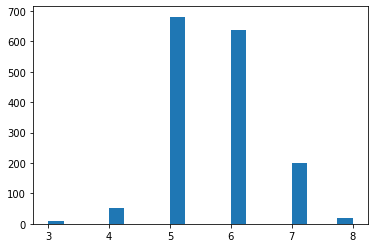

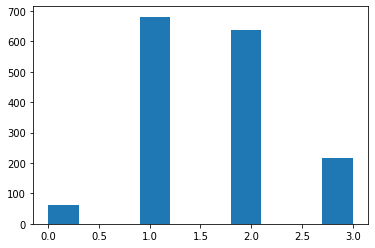

In [25]:
_=plt.hist(y, bins=20)
plt.show()

def mapping_quality(value):
    if value <= 4:
        return 0
    if value == 5:
        return 1
    if value == 6:
        return 2
    if value >= 7:
        return 3
y_reduced = np.array([mapping_quality(val) for val in y])

_=plt.hist(y_reduced, bins=10)
plt.show()

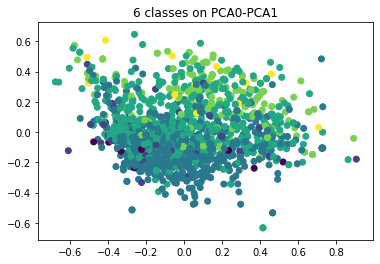

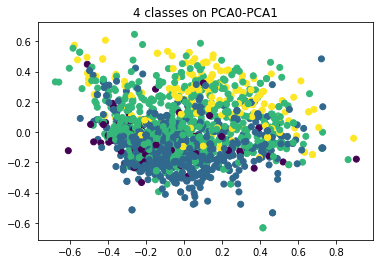

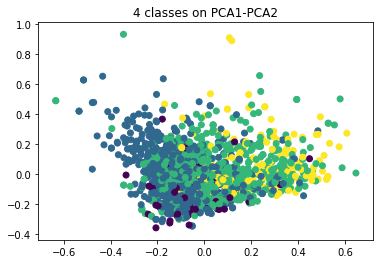

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('6 classes on PCA0-PCA1')
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_reduced)
plt.title('4 classes on PCA0-PCA1')
plt.show()

plt.scatter(X_pca[:,1], X_pca[:,2], c=y_reduced)
plt.title('4 classes on PCA1-PCA2')
plt.show()

X_pca = X_pca[:,[1,2]]

In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    
    plot_symbol_size = 15

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    lx, ly = x_max - x_min, y_max - y_min
    h = max(lx, ly) / 1000
    k = 40*h
    x_plot_adjust = 20*h
    y_plot_adjust = 20*h
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    try:
        P = clf.predict_classes(np.c_[x2.ravel(), y2.ravel()])
    except:
        P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size)
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)


    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

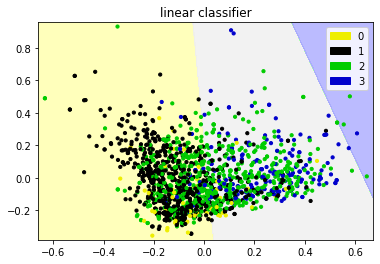

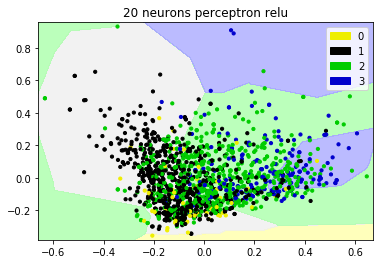

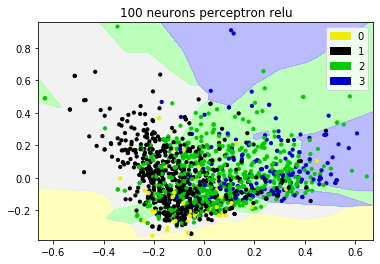

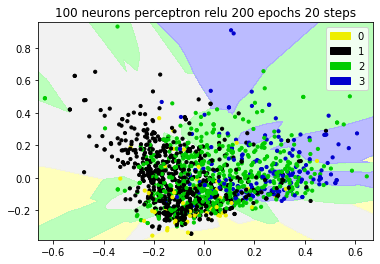

In [54]:
y_dummy = np_utils.to_categorical(y_reduced)
names = ['3 - 4', '5', '6', '7 - 8']

clf = LinearSVC(random_state=0, penalty='l2', C=1e3,  max_iter=10**6)
clf.fit(X_pca, y_reduced)
plot_class_regions_for_classifier(clf, X_pca, y_reduced, title='linear classifier', target_names=names)


model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, None, None, 100, 20, steps=50)
plot_class_regions_for_classifier(model, X_pca, y_reduced, title='20 neurons perceptron relu 100 epochs', target_names=names)

model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, None, None, 100, 100, steps=50)
plot_class_regions_for_classifier(model, X_pca, y_reduced, title='100 neurons perceptron relu 100 epochs', target_names=names)

model, history = create_and_fit_1layerPerceptron(X_pca, y_dummy, None, None, 200, 100, steps=50)
plot_class_regions_for_classifier(model, X_pca, y_reduced, 
                                  title='100 neurons perceptron relu 200 epochs',
                                  target_names=names)